In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [2]:
#讀 Var_Name sheet以求headers
headers = pd.read_excel ('MDS_Assignment2_Steelplates.xlsx', header=None, sheet_name = 'Var_Name')
headers = headers.transpose()
headers = list(headers.iloc[0])

#定義X,y for logistic Regression
df = pd.read_excel ('MDS_Assignment2_Steelplates.xlsx', header=None, names=headers,sheet_name = 'Faults' )
X = df.iloc[ : , 0:26 ]
y = df['Bumps']

#分割 train, test sets,這邊固定random_state是為了待會split PCA的 train, test sets時分割類別一致
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [3]:
#用 X_train, y_train fit LogisticRegression
#再用 X_test, y_test測試，並印出 Accuracy rate和 confusion_matrix

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy rate: {:.2f}'.format(logreg.score(X_test, y_test)))

con = confusion_matrix(y_test, y_pred)
print(con)

Accuracy rate: 0.75
[[292   4]
 [ 92   1]]


In [4]:
#定義X,y for PCA
#remove binary, category variables in X

PCA_variable = headers[0:26]
PCA_variable.remove('TypeOfSteel_A300')
PCA_variable.remove('TypeOfSteel_A400')
PCA_variable.remove('Outside_Global_Index')

X_PCA = df[PCA_variable]
y_PCA = df['Bumps']

#分割 train, test sets,並採用與前一次分割同樣的random_state
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=100)

In [5]:
#標準化 X_PCA_train, X_PCA_test
sc = StandardScaler()
X_PCA_train = sc.fit_transform(X_PCA_train)
X_PCA_test = sc.transform(X_PCA_test)

#用 X_PCA_train fit PCA
pca = PCA().fit(X_PCA_train)

In [6]:
pd.options.display.float_format = "{:,.4f}".format
eigenvector = pd.DataFrame(pca.components_)
eigenvector

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.1798,-0.1422,0.0153,0.0153,0.3162,0.3200,0.3088,0.3123,-0.2222,0.0184,...,0.1550,-0.0321,0.2760,-0.1491,-0.2564,0.3172,0.3083,0.2637,-0.0857,-0.0350
1,0.0977,0.0809,-0.0547,-0.0547,-0.0291,-0.0368,0.0571,-0.0365,-0.2697,-0.4016,...,-0.0241,-0.1672,-0.1295,-0.3269,0.2302,0.0925,-0.1166,0.2761,0.4225,-0.4264
2,0.1242,0.1453,0.5250,0.5250,-0.0119,-0.0298,-0.0835,-0.0247,-0.2262,-0.2671,...,-0.1363,0.0300,0.0945,0.2300,-0.0590,0.0148,0.0913,-0.1063,-0.2134,-0.3029
3,0.5627,0.6033,-0.0504,-0.0504,0.1536,0.1678,0.1740,0.1673,0.0057,0.1656,...,0.0139,0.1507,0.0808,-0.0313,-0.0176,0.0189,0.0151,0.0277,0.0286,0.1201
4,0.0198,0.0016,0.4225,0.4225,-0.0299,0.0032,0.0804,-0.0203,0.2514,0.2724,...,0.1379,-0.1567,-0.1121,-0.3554,0.1052,0.0376,-0.1026,0.2072,0.3346,0.2985
5,-0.1794,-0.2078,0.0288,0.0288,0.1960,0.1307,0.1547,0.2112,-0.1361,0.0709,...,-0.4448,0.5385,-0.1231,0.0434,0.3071,-0.0569,-0.1877,-0.0072,0.2248,0.0332
6,-0.0699,-0.0496,0.0118,0.0118,0.0280,-0.0320,-0.0172,0.0176,-0.0674,0.2906,...,-0.5683,-0.5986,0.1371,0.1488,0.0439,0.1214,0.0315,0.0386,0.0417,0.1267
7,-0.2250,-0.2367,0.1668,0.1668,-0.0106,0.0354,0.0319,-0.0045,0.0294,0.0227,...,0.2130,0.1733,-0.0212,0.0114,-0.0486,0.0044,0.0578,0.0016,-0.0507,-0.0010
8,-0.0452,-0.0343,-0.0903,-0.0903,-0.0228,-0.0199,0.0053,-0.0342,-0.0964,-0.0827,...,-0.0362,-0.2381,0.0822,-0.0252,0.0083,0.0864,0.0537,0.0895,0.0007,-0.1139
9,0.0615,0.0898,0.0495,0.0495,0.1416,0.0887,0.0613,0.1422,-0.0370,-0.0089,...,-0.2476,-0.0148,0.1726,0.1806,0.1307,-0.0722,-0.0876,-0.0887,0.0322,-0.0115


In [7]:
eigenvalue = np.array(pca.explained_variance_)
eigenvalue

array([8.52780277e+00, 2.89840115e+00, 2.33367576e+00, 1.77282768e+00,
       1.72907019e+00, 1.26479007e+00, 9.31917102e-01, 8.88796174e-01,
       7.11891130e-01, 6.63699077e-01, 3.84126953e-01, 3.05576153e-01,
       2.15097136e-01, 1.45058560e-01, 8.94137467e-02, 6.51047180e-02,
       5.08436803e-02, 2.39232481e-02, 1.02595931e-02, 2.09705764e-03,
       4.43349448e-04, 1.38466771e-05, 2.32106378e-11])

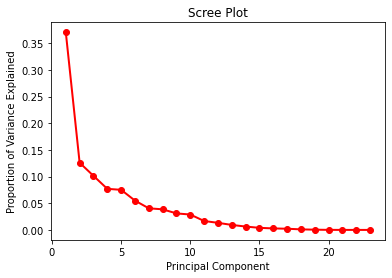

In [8]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [11]:
#針對不同components數，各自跑logistic Regression，
#看components數與Accuracy rate, confusion_matrix的關係
for i in (4,6,10,15,20):
    print("n_components=",i)
    
    #用 X_PCA_train fit PCA with n_components=i
    #因為先前已經標準化 X_PCA_train過這邊不用再標準化
    pca2 = PCA(n_components=i).fit(X_PCA_train)
    
    #transform X_PCA_train,X_PCA_test with fit 結果
    X_train2 = pca2.transform(X_PCA_train)
    X_test2 = pca2.transform(X_PCA_test)
    
    #用 X_train2, y_PCA_train fit Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train2, y_PCA_train)

    #印出Accuracy rate, confusion_matrix
    y_pred2 = logreg.predict(X_test2)
    print('Accuracy rate: {:.2f}'.format(logreg.score(X_test2, y_PCA_test)))

    con = confusion_matrix(y_PCA_test, y_pred2)
    print(con,'\n')

n_components= 4
Accuracy rate: 0.75
[[290   6]
 [ 90   3]] 

n_components= 6
Accuracy rate: 0.78
[[287   9]
 [ 77  16]] 

n_components= 10
Accuracy rate: 0.78
[[284  12]
 [ 75  18]] 

n_components= 15
Accuracy rate: 0.78
[[276  20]
 [ 64  29]] 

n_components= 20
Accuracy rate: 0.79
[[277  19]
 [ 63  30]] 

